**CAPSTONE 2 - EXPLORATORY DATA ANALYSIS**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn import metrics

C:\Users\iamku\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path="C:\Local Disk Custom\Edu\Data Science\Springboard\Capstone 2\Ideas and Related datasets\Airline passenger satisfaction"
os.chdir(path) 

filename = 'Airline-Dataset-Clean.csv'
df = pd.read_csv(filename)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(3)

,airline_name,author,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended,time
0,adria-airways,D Ito,Germany,Economy,7.0,4.0,4.0,4.0,0.0,4.0,1,2015-04-01
1,adria-airways,Ron Kuhlmann,United States,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015-01-01
2,adria-airways,E Albin,Switzerland,Economy,9.0,5.0,5.0,4.0,0.0,5.0,1,2014-09-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27198 entries, 0 to 27197
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   27198 non-null  object 
 1   author                         27198 non-null  object 
 2   author_country                 27198 non-null  object 
 3   cabin_flown                    27198 non-null  object 
 4   overall_rating                 27198 non-null  float64
 5   seat_comfort_rating            27198 non-null  float64
 6   cabin_staff_rating             27198 non-null  float64
 7   food_beverages_rating          27198 non-null  float64
 8   inflight_entertainment_rating  27198 non-null  float64
 9   value_money_rating             27198 non-null  float64
 10  recommended                    27198 non-null  int64  
 11  time                           27198 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usag

In [4]:
df.corr()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
overall_rating,1.000000,0.719935,0.775157,0.641722,0.418358,0.831300,0.873337
seat_comfort_rating,0.719935,1.000000,0.601893,0.549970,0.414681,0.706313,0.648004
cabin_staff_rating,0.775157,0.601893,1.000000,0.631894,0.365664,0.710641,0.708900
food_beverages_rating,0.641722,0.549970,0.631894,1.000000,0.501685,0.607359,0.577122
inflight_entertainment_rating,0.418358,0.414681,0.365664,0.501685,1.000000,0.404958,0.367796
value_money_rating,0.831300,0.706313,0.710641,0.607359,0.404958,1.000000,0.767302
recommended,0.873337,0.648004,0.708900,0.577122,0.367796,0.767302,1.000000


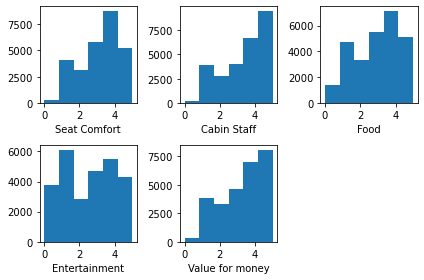

In [5]:
plt.subplot(2,3,1)
plt.hist(df['seat_comfort_rating'], bins=6)
plt.xlabel('Seat Comfort')
plt.subplot(2,3,2)
plt.hist(df['cabin_staff_rating'], bins=6)
plt.xlabel('Cabin Staff')
plt.subplot(2,3,3)
plt.hist(df['food_beverages_rating'], bins=6)
plt.xlabel('Food')
plt.subplot(2,3,4)
plt.hist(df['inflight_entertainment_rating'], bins=6)
plt.xlabel('Entertainment')
plt.subplot(2,3,5)
plt.hist(df['value_money_rating'], bins=6)
plt.xlabel('Value for money')

plt.tight_layout()
plt.show()

In [6]:
df1 = pd.concat([df.drop(['cabin_flown'], axis=1), pd.get_dummies(df['cabin_flown'], drop_first=True)], axis=1)

In [7]:
df1.head()

,airline_name,author,author_country,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended,time,Economy,First Class,Premium Economy
0,adria-airways,D Ito,Germany,7.0,4.0,4.0,4.0,0.0,4.0,1,2015-04-01,1,0,0
1,adria-airways,Ron Kuhlmann,United States,10.0,4.0,5.0,4.0,1.0,5.0,1,2015-01-01,0,0,0
2,adria-airways,E Albin,Switzerland,9.0,5.0,5.0,4.0,0.0,5.0,1,2014-09-01,1,0,0
3,adria-airways,Tercon Bojan,Singapore,8.0,4.0,4.0,3.0,1.0,4.0,1,2014-09-01,0,0,0
4,adria-airways,L James,Poland,4.0,4.0,2.0,1.0,2.0,2.0,0,2014-06-01,1,0,0


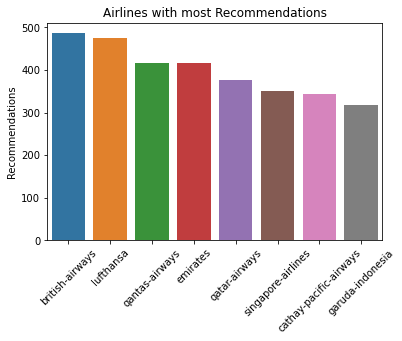

In [8]:
airlines = df[df['recommended']==1].groupby('airline_name')['recommended'].sum().sort_values(ascending=False)
airlines = pd.DataFrame(airlines).reset_index()
sns.barplot(data=airlines.head(8), x='airline_name', y='recommended')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Recommendations')
plt.title('Airlines with most Recommendations')
plt.show()

<AxesSubplot:xlabel='cabin_flown', ylabel='recommended'>

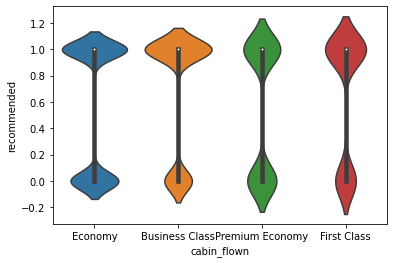

In [9]:
sns.violinplot(x='cabin_flown', y='recommended', data=df)

,cabin_flown,recommended
0,Business Class,0.708278
1,Economy,0.575640


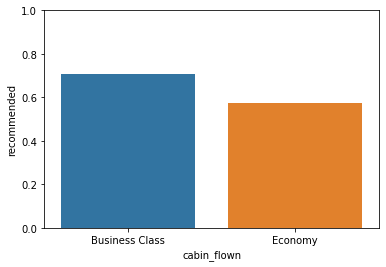

In [10]:
a = df.groupby('cabin_flown')[['recommended']].mean()
a = a.drop(['Premium Economy', 'First Class']).reset_index()
plt.ylim([0,1])
sns.barplot(x='cabin_flown', y='recommended', data=a)
a

In [11]:
rec = df[df['recommended'] == 1]
norec = df[df['recommended'] == 0]

<AxesSubplot:xlabel='overall_rating', ylabel='Count'>

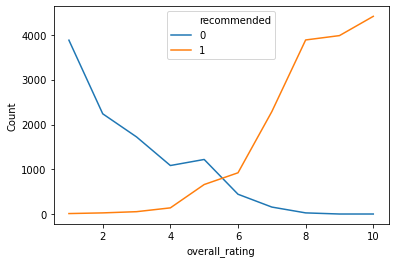

In [12]:
x = df.groupby(['overall_rating','recommended'])[['recommended']].count()
x.columns = ['Count']
x = x.reset_index()
sns.lineplot(x='overall_rating', y='Count', hue='recommended', data=x)

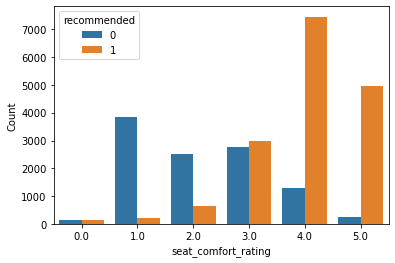

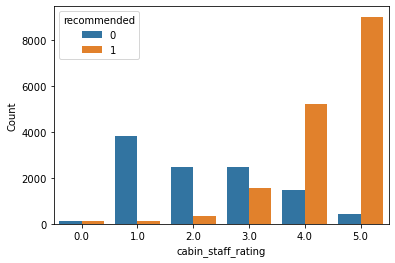

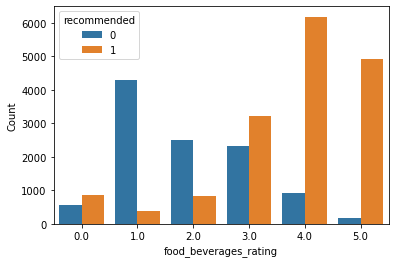

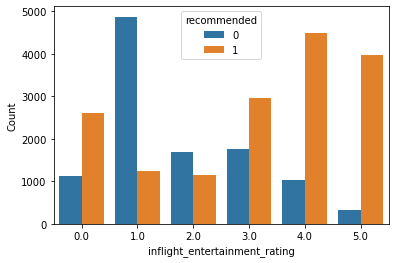

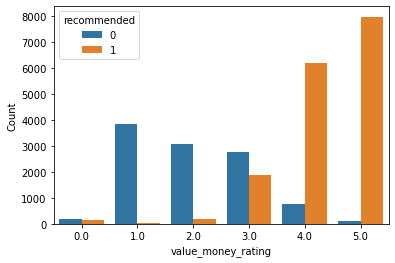

In [13]:
cols = ['seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating', 'value_money_rating']
for c in cols:
    x = df.groupby([c,'recommended'])[['recommended']].count()
    x.columns = ['Count']
    x = x.reset_index()
    sns.barplot(x=c, y='Count', hue='recommended', data=x)
    plt.show()

In [14]:
x = rec.groupby(['cabin_staff_rating'])[['recommended']].count()
x.columns = ['+ve']
x['-ve'] = norec.groupby(['cabin_staff_rating'])[['recommended']].count()
x['diff'] = x['+ve'] - x['-ve']
x.index = [0,1,2,3,4,5]
x

,+ve,-ve,diff
0,135,106,29
1,110,3851,-3741
2,335,2458,-2123
3,1571,2482,-911
4,5229,1463,3766
5,9023,435,8588


In [15]:
x2 = x[['diff']]

for c in cols:
    x2[c] = rec.groupby([c])['recommended'].count() - norec.groupby([c])['recommended'].count()
x2.drop(columns=['diff'])

C:\Users\iamku\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating
0,1,29,296,1486,-51
1,-3648,-3741,-3926,-3621,-3796
2,-1844,-2123,-1643,-547,-2891
3,205,-911,891,1196,-899
4,6176,3766,5245,3451,5412
5,4718,8588,4745,3643,7833


<AxesSubplot:xlabel='cabin_flown', ylabel='overall_rating'>

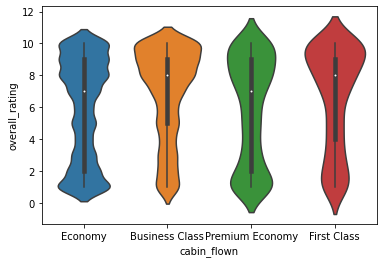

In [16]:
sns.violinplot(x='cabin_flown', y='overall_rating', data=df)

**Convert cabin_class into dummy variables**

In [18]:
df1 = pd.concat([df.drop(['cabin_flown'], axis=1), pd.get_dummies(df['cabin_flown'], drop_first=True)], axis=1)

In [19]:
df['cabin_flown'].value_counts()

Economy            19778
Business Class      5303
Premium Economy     1370
First Class          747
Name: cabin_flown, dtype: int64

**Sperate DF object for each Cabin Class to compare the influence of each Flight feature on their Recommendation**

In [20]:
Economy = df[df['cabin_flown'] == 'Economy'].drop(columns=['cabin_flown'])
Bus = df[df['cabin_flown'] == 'Business Class'].drop(columns=['cabin_flown'])
PremEcon = df[df['cabin_flown'] == 'Premium Economy'].drop(columns=['cabin_flown'])
First = df[df['cabin_flown'] == 'First Class'].drop(columns=['cabin_flown'])

In [21]:
Comparision = pd.DataFrame(df.corr()['recommended'].drop(columns=['CC']))
Comparision.columns = ['Overall']

In [22]:
Comparision['Economy'] = Economy.corr()['recommended']
Comparision['Bus'] = Bus.corr()['recommended']
Comparision['PremEcon'] = PremEcon.corr()['recommended']
Comparision['First'] = First.corr()['recommended']
Comparision = Comparision.T.drop(columns=['recommended'])
Comparision.head()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating
Overall,0.873337,0.648004,0.708900,0.577122,0.367796,0.767302
Economy,0.878046,0.644710,0.704367,0.543020,0.329923,0.759707
Bus,0.840626,0.616439,0.685589,0.639820,0.411070,0.762110
PremEcon,0.886504,0.717678,0.755388,0.711566,0.564050,0.831136
First,0.858935,0.624805,0.735967,0.678041,0.462645,0.800585


**Feature Engineering**

In [23]:
features = ['overall_rating', 'seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating', 'value_money_rating', 'Economy', 'First Class', 'Premium Economy']

X = df1[features].values
Y = df1['recommended']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20398, 8), (6800, 8), (20398,), (6800,))

**Logistic Regression**

In [24]:
classifier = LogisticRegression(random_state=42) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

C:\Users\iamku\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
print("Confusion Matrix : \n", cm)
print("Accuracy : ", np.round(acc, 4))
print("Precision :", np.round(metrics.precision_score(y_test, y_pred, pos_label = 1), 4))
print("Recall : ", np.round(metrics.recall_score(y_test, y_pred, pos_label = 0), 4))

Confusion Matrix : 
 [[2560  174]
 [ 169 3897]]
Accuracy :  0.9496
Precision : 0.9573
Recall :  0.9364


**KNN Classifier with GridSearchCV**

In [26]:
param_grid = {'n_neighbors':np.arange(11,49,2)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
       45, 47])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9475438768506717
Best Parameters: {'n_neighbors': 35}


In [28]:
knn_best = KNeighborsClassifier(35).fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix : \n", cm)
print("Accuracy : ", np.round(acc, 4))
print("Precision :", np.round(metrics.precision_score(y_test, y_pred, pos_label = 1), 4))
print("Recall : ", np.round(metrics.recall_score(y_test, y_pred, pos_label = 0), 4))

Confusion Matrix : 
 [[2581  153]
 [ 191 3875]]
Accuracy :  0.9494
Precision : 0.962
Recall :  0.944


**Random Forest**

In [30]:
param_grid = {'n_estimators':np.arange(50, 300, 50)}
rfc = RandomForestClassifier(random_state=42)
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [31]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score:0.940974605353466
Best Parameters: {'n_estimators': 200}


In [32]:
rfc_best = RandomForestClassifier(200, random_state=42).fit(X_train, y_train)
y_pred = rfc_best.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix : \n", cm)
print("Accuracy : ", np.round(acc, 4))
print("Precision :", np.round(metrics.precision_score(y_test, y_pred, pos_label = 1), 4))
print("Recall : ", np.round(metrics.recall_score(y_test, y_pred, pos_label = 0), 4))

Confusion Matrix : 
 [[2556  178]
 [ 186 3880]]
Accuracy :  0.9465
Precision : 0.9561
Recall :  0.9349


**Model Evaluation**

| Model | Accuracy | Precision | Recall |
| --- | --- | --- | --- |
| Logistic Regression | 0.9496 | 0.9573 | 0.9364 |
| KNN | 0.9494 | 0.9620 | 0.9440 |
| Random Forest | 0.9465 | 0.9561 | 0.9349 |

# KNN shows highest accuracy and has the best performance.